<a href="https://colab.research.google.com/github/nithindsouza/Image_Denoising_Autoencoder_Keras/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Image Denoising Autoencoder**
###With **Salt** And **Pepper** Noise
Encoder : - a function f that compresses the input into a latent-space representation. f(x) = h

Decoder : - a function g that reconstruct the input from the latent space representation. g(h) ~ x.

In [ ]:
#importing dataset
from keras.datasets import mnist

In [ ]:
#importing required libraries
import keras
from keras.models import Model
from keras.optimizers import Adadelta
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Preprocessing of Dataset And Adding Salt and Pepper Noise to our dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# to convert values from 0 to 255 into range 0 to 1.
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.
train_X = np.reshape(train_X, (len(train_X), 28, 28, 1)) 
test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))  

noise_factor = 0.5

#np.random.normal => random means to obtain random samples
#normal means normal or gaussian distribution, 
#i.e. random sample from gaussian distribution
train_X_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)  
test_X_noisy = test_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_X.shape) 

# to make values in the range of 0 to 1, 
#if values < 0 then they will be equal to 0 and 
#if values > 1 then they will be equal to 1.
train_X_noisy = np.clip(train_X_noisy, 0., 1.)   
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Defining our Image denoising autoencoder using keras
Input_img = Input(shape=(28, 28, 1))  

#encoding architecture
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
encoded    = MaxPool2D( (2, 2), padding='same')(x3)

# decoding architecture
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x2 = UpSampling2D((2, 2))(x2)
x1 = Conv2D(64, (3, 3), activation='relu')(x2)
x1 = UpSampling2D((2, 2))(x1)
decoded   = Conv2D(1, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
#Structure of our Autoencoder
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0     

In [ ]:
#Performing Early Stopping and Then fitting training and testing data to our autoencoder
from keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [ ]:
#Training our autoencoder and validating it on validation data
a_e = autoencoder.fit(train_X_noisy, train_X,epochs=1000,batch_size=128,shuffle=True,validation_data=(test_X_noisy, test_X),callbacks=[early_stopper])

Epoch 1/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2118 - val_loss: 0.2115
Epoch 2/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2117 - val_loss: 0.2114
Epoch 3/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2116 - val_loss: 0.2113
Epoch 4/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2115 - val_loss: 0.2112
Epoch 5/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2115 - val_loss: 0.2111
Epoch 6/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2114 - val_loss: 0.2111
Epoch 7/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2113 - val_loss: 0.2110
Epoch 8/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2112 - val_loss: 0.2109
Epoch 9/1000
469/469 [==============================] - 5s 11ms/step - loss: 0.2112 - val_loss: 0.2108
Epoch 10/1000
469/469 [==============================] - 5s 12ms/step - l

In [ ]:
#saving model
autoencoder.save('autoenc_1000_epoch.h5')

In [ ]:
#Making Predictions
# to predict the reconstructed images for the original images...
pred = autoencoder.predict(test_X_noisy)

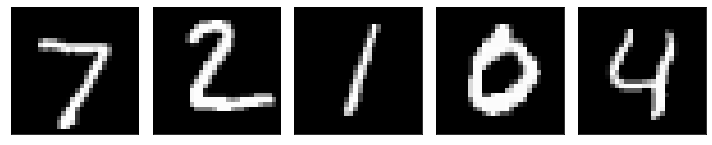

In [ ]:
#Visualizing original image
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(test_X[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

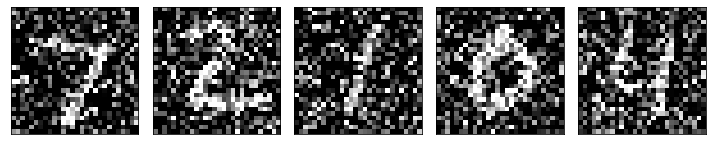

In [ ]:
#visualizing noise image
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(test_X_noisy[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

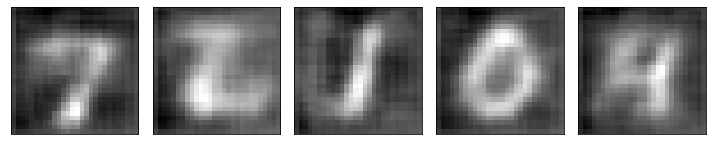

In [ ]:
# to visualize reconstructed images(output of autoencoder)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()